In [47]:
import numpy as np
import matplotlib.pyplot as plt

Правая часть уравнения

In [48]:
def f(x, y):
    # ctg x = 1 / tan(x)
    return y * (1 / np.tan(x)) + 2 * x * np.sin(x)

Метод Эйлера

In [49]:
def euler_method(f, x0, x_end, y0, h):
    N = int((x_end - x0) / h)
    x = np.linspace(x0, x_end, N+1)
    y = np.zeros(N+1)
    y[0] = y0
    
    for i in range(N):
        y[i+1] = y[i] + h * f(x[i], y[i])
    
    return x, y

Метод Рунге–Кутты 4-го порядка

In [50]:
def runge_kutta_4(f, x0, x_end, y0, h):
    N = int((x_end - x0) / h)
    x = np.linspace(x0, x_end, N+1)
    y = np.zeros(N+1)
    y[0] = y0
    
    for i in range(N):
        xi = x[i]
        yi = y[i]
        
        k1 = f(xi, yi)
        k2 = f(xi + h/2, yi + h/2 * k1)
        k3 = f(xi + h/2, yi + h/2 * k2)
        k4 = f(xi + h, yi + h * k3)
        
        y[i+1] = yi + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    
    return x, y

Запуск расчётов

In [51]:
# Начальные условия
x0 = np.pi / 2
x_end = 3 * np.pi / 4
y0 = 0

# Выбор шага для точности 0.001
h = 0.009  # начальный шаг

# Решения
x_e, y_e = euler_method(f, x0, x_end, y0, h)
x_rk, y_rk = runge_kutta_4(f, x0, x_end, y0, h)

print("Расчёт завершён.")

Расчёт завершён.


Графики

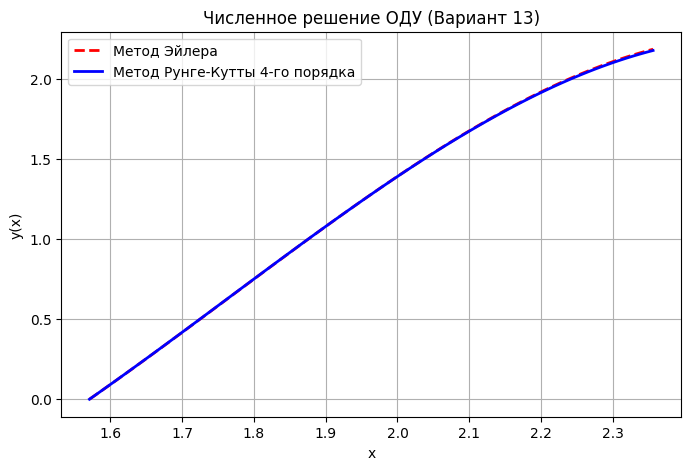

In [52]:
plt.figure(figsize=(8, 5))
plt.plot(x_e, y_e, 'r--', label='Метод Эйлера', linewidth=2)
plt.plot(x_rk, y_rk, 'b-', label='Метод Рунге-Кутты 4-го порядка', linewidth=2)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Численное решение ОДУ (Вариант 13)')
plt.legend()
plt.grid(True)
plt.show()

Оценка точности по правилу Рунге

In [53]:
# Уточнённое решение (меньший шаг)
h2 = h / 2
_, y_rk2 = runge_kutta_4(f, x0, x_end, y0, h2)

# Интерполируем на сетку с шагом h (берем каждый второй элемент)
y_rk2_on_h = y_rk2[::2]

# Оценка погрешности
error = np.abs(y_rk - y_rk2_on_h)
max_error = error.max()

print(f"Максимальная ошибка (по правилу Рунге): {max_error:.6f}")

if max_error < 0.001:
    print("✅ Точность 0.001 достигнута.")
else:
    print("⚠️ Точность недостаточна. Уменьшите шаг h.")

Максимальная ошибка (по правилу Рунге): 0.000007
✅ Точность 0.001 достигнута.
